Задача:

Построить модель нейронной сети, предсказывающую поломку программного обеспечения по его анонимным признакам. В данной задаче необходимо оптимизировать метрику ROC_AUC.

In [1]:
# %pip install tensorflow

In [2]:
# %pip install keras

In [3]:
import pandas as pd
from phik.report import plot_correlation_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Загрузите данные. Проведите EDA по вашему датасету, опишите основные идеи для последующей генерации новых признаков.

In [4]:
df = pd.read_csv('train_3.2.csv')
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [6]:
df['defects'] = df['defects'].astype(int)

In [7]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [8]:
# Проверяем наличие дубликатов
duplicates = df.duplicated()

# Фильтруем DataFrame по дубликатам
duplicated_rows = df.loc[duplicates]
duplicated_rows

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects


In [9]:
df.isna().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [10]:
df.nunique()

id                   101763
loc                     378
v(g)                    106
ev(g)                    71
iv(g)                    84
n                       836
v                      4515
l                        55
d                      3360
i                      5171
e                      8729
b                       315
t                      8608
lOCode                  298
lOComment                91
lOBlank                  94
locCodeAndComment        29
uniq_Op                  70
uniq_Opnd               176
total_Op                623
total_Opnd              485
branchCount             144
defects                   2
dtype: int64

interval columns not set, guessing: ['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects']


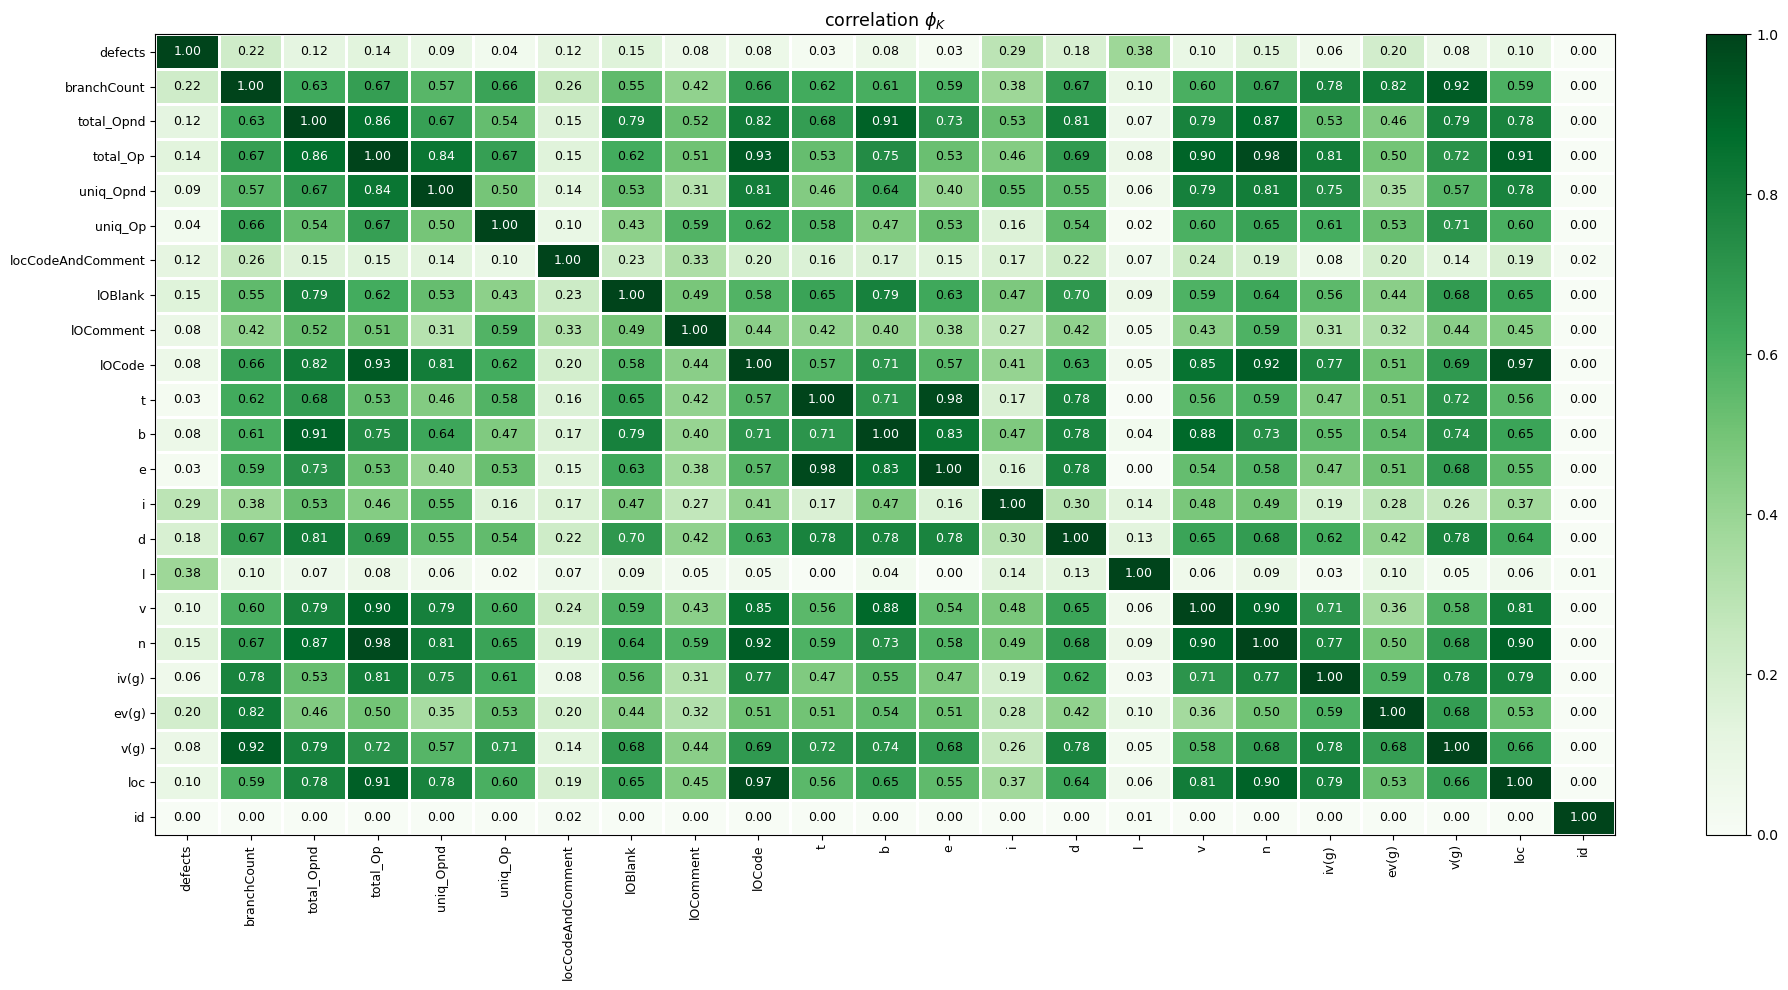

In [11]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(20, 10))
plt.tight_layout()

##### Сильно скоррелированные данные (возьмем признаки с корреляцией выше 0.95):
- Total_Op и n
- IOCode и loc
- t и e
##### Можно оставить только по одному признаку из каждой пары. Также удалим столбец id, он никак не поможет в построении модели. 


Проведите разбиение на тренировочные и валидационные данные. Проведите необходимую предобработку данных для последующего обучения нейронной сети.

In [12]:
X = df.drop('defects',axis=1)
y = df.defects

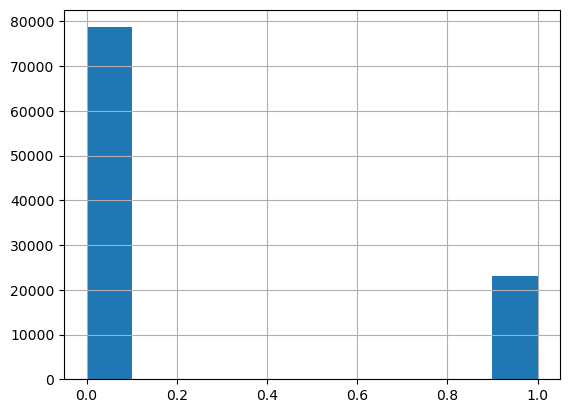

In [13]:
y.hist();

Сильный дисбаланс классов

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Стандартизуем данные

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [16]:
from sklearn.utils import class_weight

# Получение весов классов
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.64653187, 2.20611349])


Реализуйте функцию, в которой вы будете определять архитектуру модели. Функция должна возвращать скомпилированную модель.

In [17]:
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

Обучите модель нейронной сети (без использования методов регуляризации) на исходной тренировочной выборке (без добавления новых признаков). В процессе обучения нужно отслеживать метрику ROC_AUC на каждой эпохе, на валидационных данных.

In [18]:
model = create_model()

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=512,
           class_weight={0:class_weights[0], 1:class_weights[1]})



Epoch 1/10


160/160 [==============================] - 1s 4ms/step - loss: 0.5696 - auc: 0.7778 - val_loss: 0.5318 - val_auc: 0.7880
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5573 - auc: 0.7869 - val_loss: 0.5642 - val_auc: 0.7901
Epoch 3/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5561 - auc: 0.7877 - val_loss: 0.5389 - val_auc: 0.7901
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5543 - auc: 0.7892 - val_loss: 0.5611 - val_auc: 0.7910
Epoch 5/10
160/160 [==============================] - 0s 3ms/step - loss: 0.5531 - auc: 0.7900 - val_loss: 0.5505 - val_auc: 0.7898
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5531 - auc: 0.7898 - val_loss: 0.5166 - val_auc: 0.7900
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 0.5534 - auc: 0.7901 - val_loss: 0.5240 - val_auc: 0.7891
Epoch 8/10
160/160 [==============================] - 0s 2ms/step - loss

In [19]:
# Получение значений лосса и валидационного лосса из истории
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    # Построение графика лосса и валидационного лосса
    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_20148\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


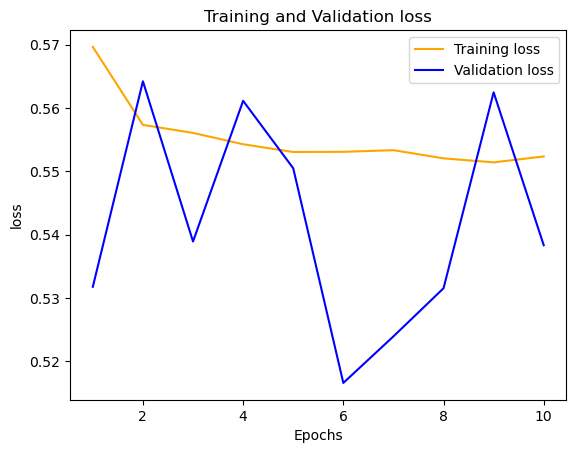

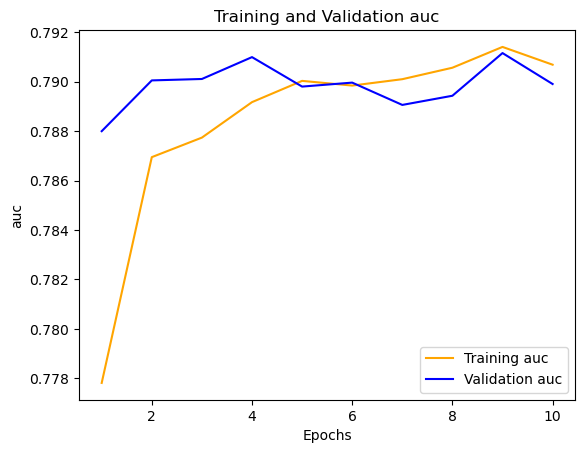

In [20]:
check_metrics(history, 'loss')
check_metrics(history, 'auc')


Сгенерируйте новые признаки исходя из вашего EDA или наоборот — удалите ненужные признаки, которые препятствуют лучшему качеству модели при обучении. 


Переобучите модель на данных, которые представляют из себя новый датафрейм, и оцените, как изменилось качество модели (то есть вы либо добавили новые признаки, либо удалили старые, либо всё вместе). Исходя из этого примите решение, какие новые признаки хорошо повлияли на качество, а какие нет.

In [21]:
X = df.drop(['id', 'n', 'loc', 'e'], axis=1)
y = df.defects
X.head()

,v(g),ev(g),iv(g),v,l,d,i,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,3.0,1.0,2.0,278.63,0.06,19.56,14.25,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,0
1,2.0,1.0,2.0,151.27,0.14,7.00,21.11,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,0
2,2.0,1.0,2.0,197.65,0.11,8.05,22.76,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,0
3,1.0,1.0,1.0,94.01,0.19,5.25,17.86,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,1
4,2.0,1.0,2.0,60.94,0.18,5.63,12.44,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,0


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [24]:
model_new = create_model()
history_new = model_new.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=512,
           class_weight={0:class_weights[0], 1:class_weights[1]})

Epoch 1/10
160/160 [==============================] - 1s 4ms/step - loss: 0.0931 - auc: 0.9988 - val_loss: 0.0056 - val_auc: 0.9996
Epoch 2/10
160/160 [==============================] - 0s 2ms/step - loss: 0.0035 - auc: 0.9999 - val_loss: 0.0031 - val_auc: 0.9998
Epoch 3/10
160/160 [==============================] - 0s 3ms/step - loss: 0.0026 - auc: 0.9999 - val_loss: 0.0024 - val_auc: 0.9998
Epoch 4/10
160/160 [==============================] - 0s 2ms/step - loss: 2.7831e-04 - auc: 1.0000 - val_loss: 0.0012 - val_auc: 1.0000
Epoch 5/10
160/160 [==============================] - 0s 2ms/step - loss: 1.5338e-04 - auc: 1.0000 - val_loss: 0.0011 - val_auc: 0.9999
Epoch 6/10
160/160 [==============================] - 0s 2ms/step - loss: 1.0524e-04 - auc: 1.0000 - val_loss: 9.9636e-04 - val_auc: 0.9999
Epoch 7/10
160/160 [==============================] - 0s 2ms/step - loss: 7.5175e-05 - auc: 1.0000 - val_loss: 9.9798e-04 - val_auc: 0.9999
Epoch 8/10
160/160 [==============================] 

C:\Users\msi\AppData\Local\Temp\ipykernel_20148\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


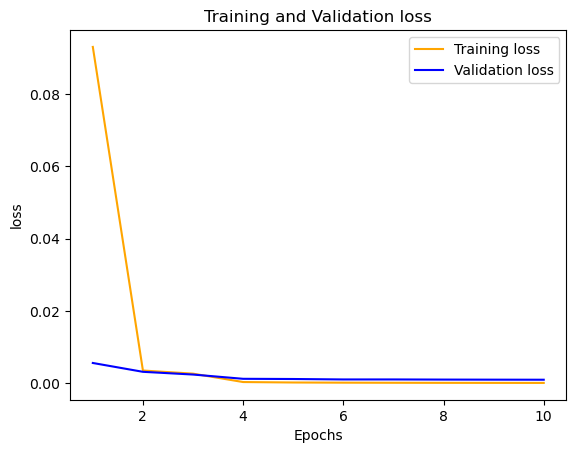

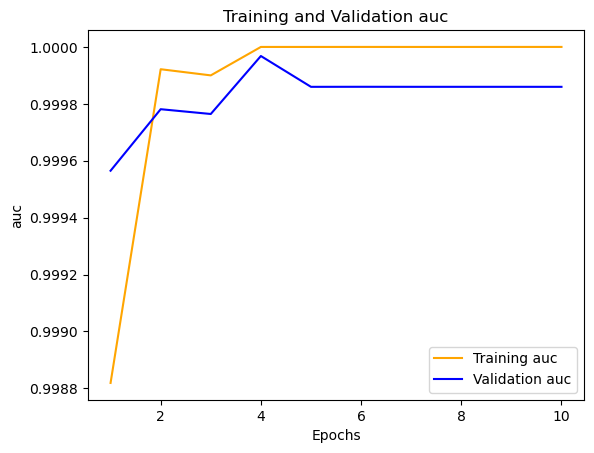

In [25]:
check_metrics(history_new, 'loss')
check_metrics(history_new, 'auc')


Собрав финальный датасет, который состоит из отфильтрованных (или добавленных) новых признаков, добавьте в вашу модель методы регуляризации — BatchNorm, Dropout, EarlyStopping, а также реализуйте автоматическое сохранение наилучших весов по метрике ROC_AUC на лучшей эпохе.

In [26]:
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [27]:
def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['AUC']
                  )
    
    return model

In [28]:
model = create_model()

early_stopping = EarlyStopping(monitor='val_auc', patience=5)
save_best_weights = ModelCheckpoint(filepath='data',
                                    save_weights_only=True,
                                    monitor='val_auc',
                                    mode='max',
                                    save_best_only=True)

history = model.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10,
           batch_size=512,
           class_weight={0:class_weights[0], 1:class_weights[1]},
           callbacks=[early_stopping,save_best_weights])

Epoch 1/10
160/160 [==============================] - 3s 8ms/step - loss: 0.0377 - auc: 0.9991 - val_loss: 0.0565 - val_auc: 0.9995
Epoch 2/10
160/160 [==============================] - 1s 7ms/step - loss: 0.0041 - auc: 0.9999 - val_loss: 0.0124 - val_auc: 0.9997
Epoch 3/10
160/160 [==============================] - 1s 7ms/step - loss: 0.0024 - auc: 0.9999 - val_loss: 0.0046 - val_auc: 0.9998
Epoch 4/10
160/160 [==============================] - 1s 6ms/step - loss: 0.0016 - auc: 1.0000 - val_loss: 0.0021 - val_auc: 0.9996
Epoch 5/10
160/160 [==============================] - 1s 6ms/step - loss: 0.0020 - auc: 0.9999 - val_loss: 0.0047 - val_auc: 0.9998
Epoch 6/10
160/160 [==============================] - 1s 7ms/step - loss: 0.0010 - auc: 1.0000 - val_loss: 0.0040 - val_auc: 0.9999
Epoch 7/10
160/160 [==============================] - 1s 6ms/step - loss: 7.7639e-04 - auc: 0.9999 - val_loss: 0.0015 - val_auc: 0.9999
Epoch 8/10
160/160 [==============================] - 1s 7ms/step - loss

C:\Users\msi\AppData\Local\Temp\ipykernel_20148\1788751155.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train, 'b', label=f'Training {figure_name}', color='orange')


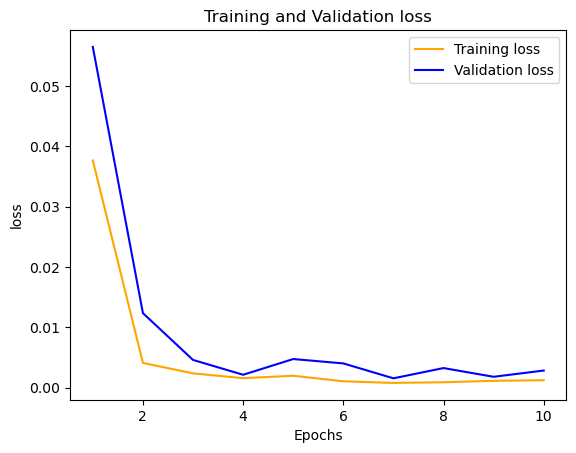

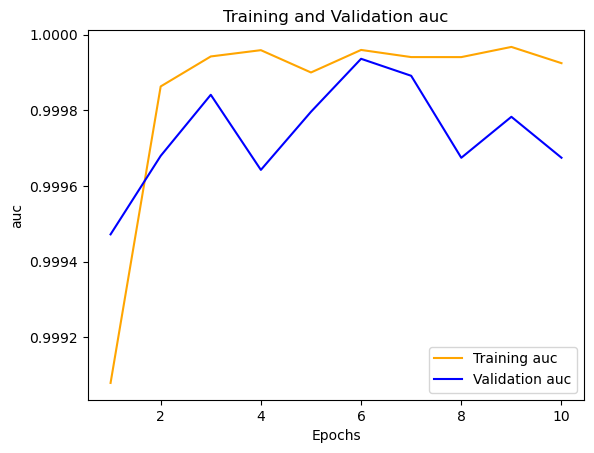

In [29]:
check_metrics(history, 'loss')
check_metrics(history, 'auc')

In [30]:
model.load_weights("data")

In [31]:
treshold = 0.5
y_pred = [1 if i > treshold else 0 for i in model.predict(X_val)]

637/637 [==============================] - 1s 1ms/step


In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score(y_val, y_pred)

0.9995552731893266


Напишите вывод по всему проекту, он должен содержать в себе:

Какие методы регуляризации улучшили качество, а какие плохо повлияли

Какие признаки повлияли на качество обучения (в лучшую сторону)

Наилучшую метрику ROC_AUC на валидации

- Наилучшая метрика ROC_AUC - 1.0
Положительно на качество обучения повлияло удаление сильно скоррелированных признаков и неинформативного id
Методы регуляризации здесь лишние